## Using features extracted from intensity profiles


In [ ]:
!pip install adjustText

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns
from adjustText import adjust_text
from sklearn.cluster import SpectralClustering

In [ ]:
import matplotlib.pylab as pylab
params = {
    'font.size': 12,
    'legend.fontsize':'large',
    'figure.titlesize':'large',
    'axes.grid':False,
    'axes.labelsize':'large',
    'axes.titlesize':'large',
    'xtick.labelsize':'large',
    'ytick.labelsize':'large',
    #'figure.figsize': (5, 6)
    }
pylab.rcParams.update(params)

In [ ]:
## experimental data
# file_name = 'experimental data - attributes.xlsx'
# sheet_name = 'all plaques'
# n_rows = 153
# round_one_cells = [0, 20, 34, 49, 73, 86, 94, 117]

## equivalent toy data
# file_name = 'S1.xlsx'
# sheet_name = 'attributes'
# n_rows = 40
# round_one_cells = [0, 10, 20, 30]

# similar toy data
file_name = 'S2.xlsx'
sheet_name = 'attributes'
n_rows = 40
round_one_cells = [0, 10, 20, 30]

## dissimilar toy data
# file_name = 'S3.xlsx'
# sheet_name = 'attributes'
# n_rows = 56
# round_one_cells = [0, 11, 24, 31, 37, 47]


attributes_df = pd.read_excel(file_name, sheet_name, nrows=n_rows)
attributes_df = attributes_df.drop(labels=['Unnamed: 0', 'Cell #', 'Plaque', 'Cell ID'], axis=1)
indices = ['GFP max', 'Infection time', 'Rise time', 'Lysis time', 'Infection duration', 'Rise rate', 'Area']
scaled_data = StandardScaler().fit_transform(attributes_df)
# pd.DataFrame(scaled_data, columns=attributes_df.columns)

Cluster
0    7
2    7
5    7
3    6
4    5
1    4
6    3
7    1
Name: count, dtype: int64


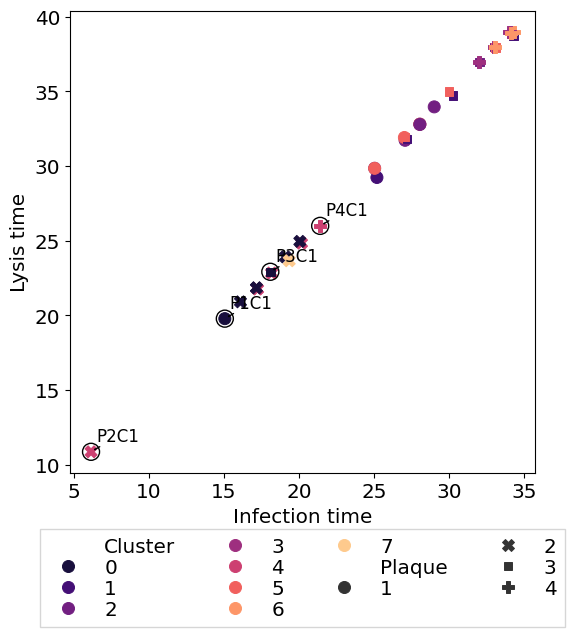

In [ ]:
model = SpectralClustering(n_clusters=2, n_components=8, affinity ='nearest_neighbors', n_neighbors=10, assign_labels='discretize')
attributes_df = pd.read_excel(file_name, sheet_name, nrows=n_rows)
attributes_df['Cluster'] = model.fit_predict(scaled_data)
print(attributes_df['Cluster'].value_counts())

x_axis='Infection time'
y_axis='Lysis time'

fig, ax = plt.subplots(figsize=(6, 6))
annot = []
xs = []
ys = []
texts = []
unique_clusters = attributes_df['Cluster'].unique()
num_clusters = len(unique_clusters)
color_palette = sns.color_palette('magma', num_clusters)
ax = sns.scatterplot(x=x_axis, y=y_axis, data=attributes_df, style='Plaque', s=75, ec=None, hue='Cluster', palette=color_palette)

for round_one_cell in round_one_cells:
    xs.append(attributes_df[x_axis].loc[round_one_cell])
    ys.append(attributes_df[y_axis].loc[round_one_cell])
    annot.append(f'P{round_one_cells.index(round_one_cell) + 1}C1')
    ax.scatter(attributes_df[x_axis].loc[round_one_cell], attributes_df[y_axis].loc[round_one_cell], s=150, facecolors='none',
                edgecolors='k')
for x, y, s in zip(xs, ys, annot):
    texts.append(plt.text(x, y, s))
ax.set_xlabel(x_axis)
ax.set_ylabel(y_axis)
adjust_text(texts, only_move={'points':'y', 'texts':'y'}, expand=(1.2, 2), arrowprops=dict(arrowstyle="->", color='k', lw=1.))
plt.legend(loc='upper center', labelspacing=0.1, bbox_to_anchor=(0.5, -0.1), ncol=4, fancybox=False, shadow=False)
plt.show()